In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the time Series Graph 

In [2]:
pd.plotting.register_matplotlib_converters()

plot_file = pd.read_csv('BSESN.csv',header=0,parse_dates=[0],index_col=0)

In [3]:
plot_file.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-11,4198.720215,4233.259766,4178.509766,4228.290039,4228.290039,0.0
2000-12-12,4254.160156,4255.689941,4210.149902,4219.479980,4219.479980,0.0
2000-12-13,4235.560059,4298.629883,4235.560059,4284.979980,4284.979980,0.0
2000-12-14,4297.439941,4332.649902,4256.339844,4270.450195,4270.450195,0.0
2000-12-15,4241.459961,4264.830078,4130.600098,4137.160156,4137.160156,0.0


In [4]:
plot_file=plot_file.drop(['Open','High','Low','Volume','Adj Close'], axis=1)
plot_file.head()

,Close
Date,
2000-12-11,4228.290039
2000-12-12,4219.479980
2000-12-13,4284.979980
2000-12-14,4270.450195
2000-12-15,4137.160156


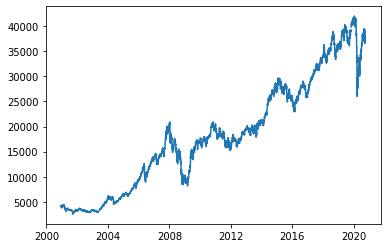

In [5]:
plt.plot(plot_file)
plt.show()

In [6]:
#df = plot_file.insert(1,'Return',np.log(plot_file['Close'])-np.log(plot_file['Close']-1),True)
#df.head()

# Log Return Time Series

In [7]:
plot_file_return = plot_file.assign(Return = np.log(plot_file['Close']/plot_file['Close'].shift(1)).dropna())

In [8]:
plot_file_return=plot_file_return.drop('Close', axis=1)
plot_file_return.head()

,Return
Date,
2000-12-11,NaN
2000-12-12,-0.002086
2000-12-13,0.015404
2000-12-14,-0.003397
2000-12-15,-0.031710


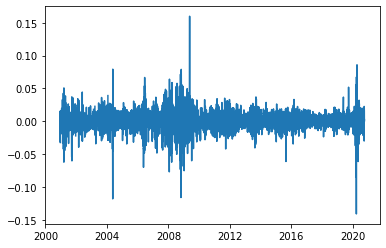

In [9]:
plt.plot(plot_file_return)
plt.show()

# Auto Correlation

In [30]:
# Try 1
#plot_file_acf = pd.read_csv('BSESN.csv',header=0,parse_dates=[0],index_col=0)
#plot_acf(plot_file_return['Return'], lags =20)
#plt.show()

In [32]:
# Testing
AutoCorrelation = plot_file_return['Return'].autocorr(lag = 20)
print(AutoCorrelation)
# This works fine

-0.003272881682413807


In [25]:
plot_file_return_resampled = plot_file_return.resample('BM').mean()
plot_file_return_resampled.head()

,Return
Date,
2000-12-29,-0.003504
2001-01-31,0.005060
2001-02-28,-0.000929
2001-03-30,-0.008810
2001-04-30,-0.002818


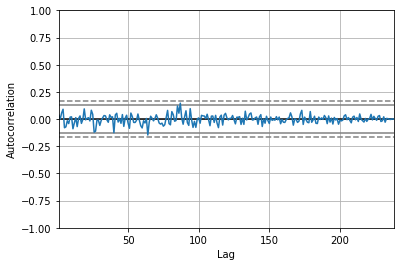

In [28]:
pd.plotting.autocorrelation_plot(plot_file_return_resampled)

# Distribution Plotting

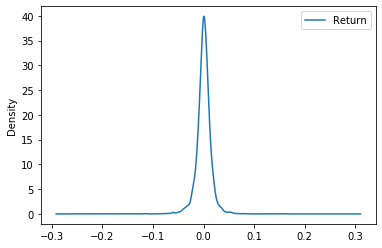

In [29]:
plot_file_return.plot(kind = 'kde')
plt.show()